### Pre-Processing the Data

In [4]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv("C:\\Users\\johnn\\OneDrive\\Desktop\\ML_DATASETS\\CLASSIFICATION\\Drug_classification\\drug200.csv")
print(data)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


#### Describe the data

In [6]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


#### check for any null values

In [7]:
print(data.isna().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [8]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#### Changing format of certain features

In [11]:
data['Sex']=np.where(data['Sex']=='M',1,0)

In [12]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,DrugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,drugC
196,16,1,LOW,HIGH,12.006,drugC
197,52,1,NORMAL,HIGH,9.894,drugX
198,23,1,NORMAL,NORMAL,14.020,drugX


In [13]:
data['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [14]:
data['BP']=np.where(data['BP']=='LOW',1,np.where(data['BP']=='NORMAL',2,3))

In [15]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,3,HIGH,25.355,DrugY
1,47,1,1,HIGH,13.093,drugC
2,47,1,1,HIGH,10.114,drugC
3,28,0,2,HIGH,7.798,drugX
4,61,0,1,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,HIGH,11.567,drugC
196,16,1,1,HIGH,12.006,drugC
197,52,1,2,HIGH,9.894,drugX
198,23,1,2,NORMAL,14.020,drugX


In [16]:
data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [17]:
data['Cholesterol']=np.where(data['Cholesterol']=='NORMAL',0,1)

In [18]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,3,1,25.355,DrugY
1,47,1,1,1,13.093,drugC
2,47,1,1,1,10.114,drugC
3,28,0,2,1,7.798,drugX
4,61,0,1,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,1,11.567,drugC
196,16,1,1,1,12.006,drugC
197,52,1,2,1,9.894,drugX
198,23,1,2,0,14.020,drugX


In [19]:
data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

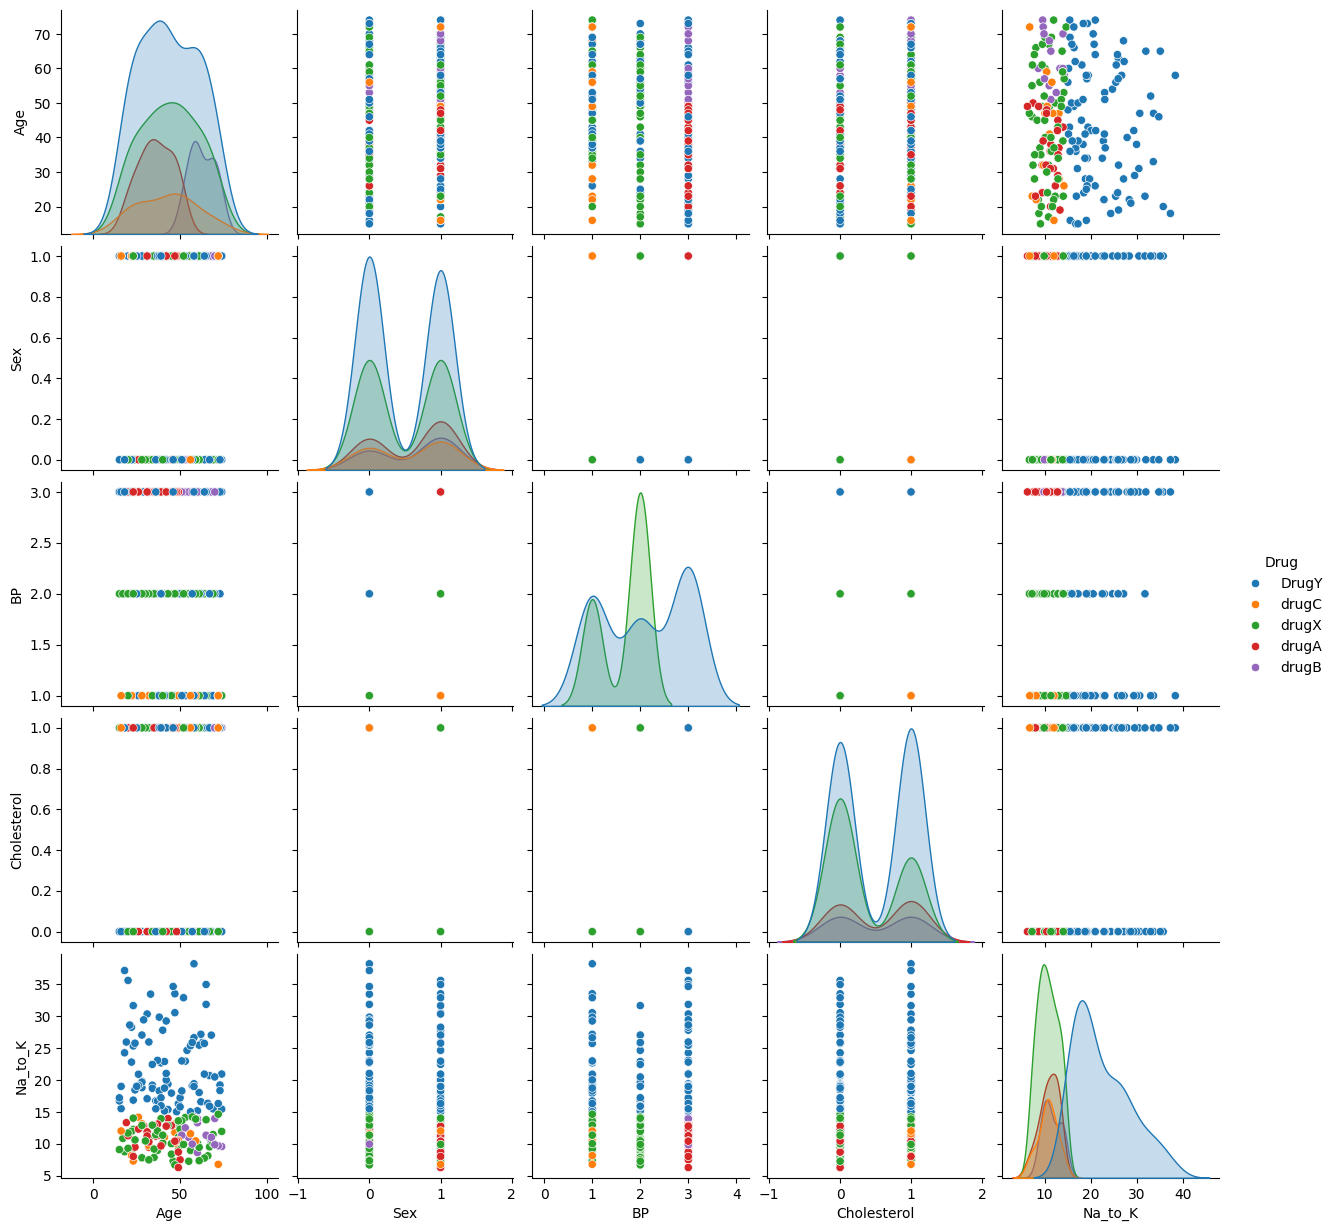

In [81]:
sns.pairplot(data,hue='Drug')
plt.show()

#### Checking for outliers

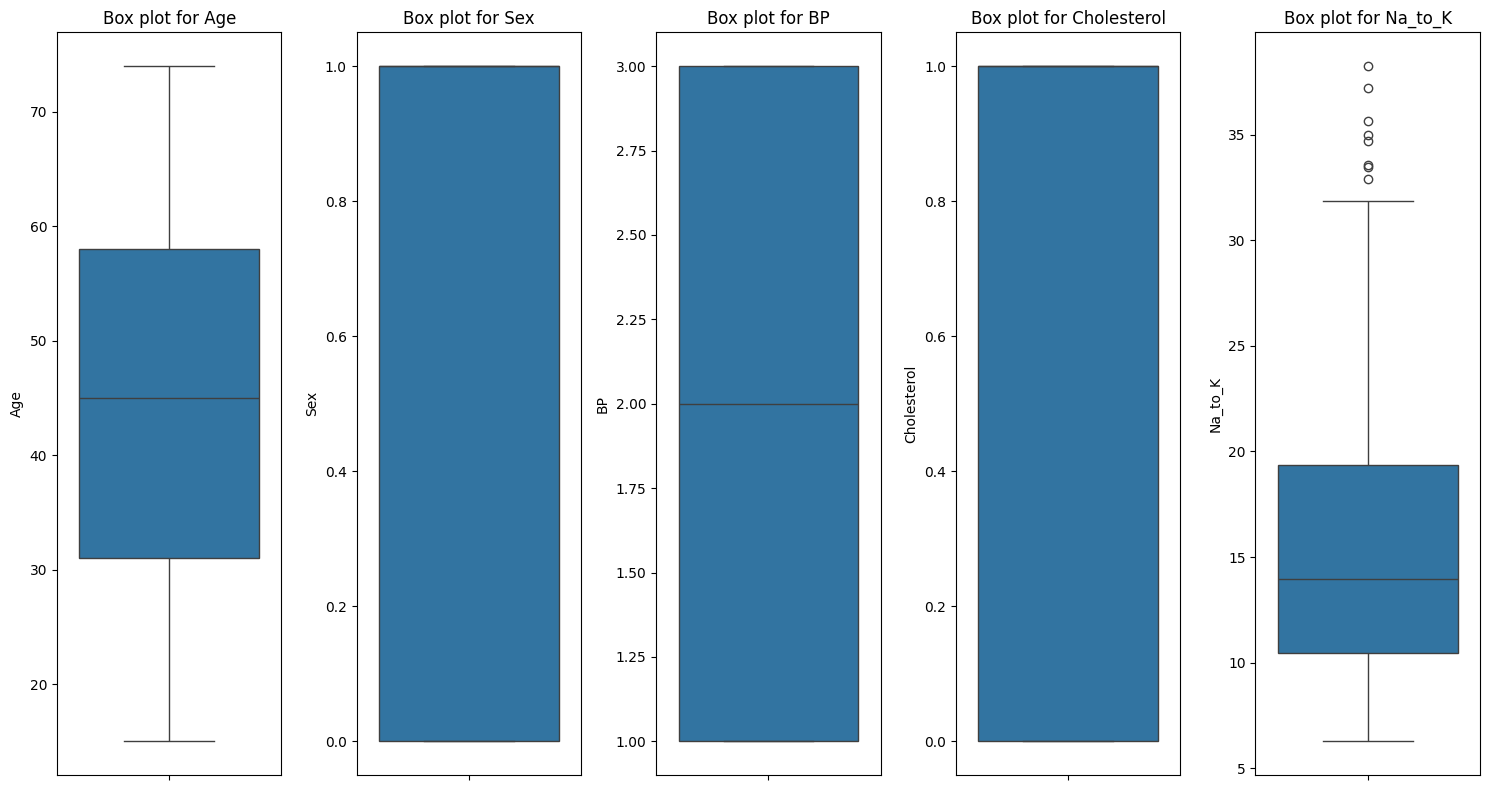

In [21]:
def plot_boxplots(df):
    # Select numeric columns
    numeric_columns = df.select_dtypes(include='number').columns

    # Set up the matplotlib figure
    plt.figure(figsize=(15, 8))
    for i, column in enumerate(numeric_columns, start=1):
        plt.subplot(1, len(numeric_columns), i)
        sns.boxplot(y=df[column])
        plt.title(f'Box plot for {column}')

    plt.tight_layout()
    plt.show()
plot_boxplots(data)

In [22]:
#duplicates or redundant data
data.duplicated().sum()

0

In [23]:
y=np.array(data['Drug'].unique())

In [24]:
for i in y:
    print(i,(data['Drug']==i).sum())

DrugY 91
drugC 16
drugX 54
drugA 23
drugB 16


In [25]:
def extract_outliers_iqr(df, column, threshold=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    print(q1)
    print(q3)
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers_df = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers_df
outliers_iqr = extract_outliers_iqr(data, 'Na_to_K')
print(outliers_iqr)


10.4455
19.38
     Age  Sex  BP  Cholesterol  Na_to_K   Drug
24    33    0   1            1   33.486  DrugY
96    58    0   1            1   38.247  DrugY
98    20    1   3            0   35.639  DrugY
128   47    1   1            0   33.542  DrugY
131   52    1   1            0   32.922  DrugY
184   18    0   3            1   37.188  DrugY
188   65    1   3            0   34.997  DrugY
194   46    0   3            1   34.686  DrugY


In [26]:
## removing outliers
data_cleaned = data[~data['Na_to_K'].isin(outliers_iqr['Na_to_K'])]

In [27]:
data_cleaned

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,3,1,25.355,DrugY
1,47,1,1,1,13.093,drugC
2,47,1,1,1,10.114,drugC
3,28,0,2,1,7.798,drugX
4,61,0,1,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,1,11.567,drugC
196,16,1,1,1,12.006,drugC
197,52,1,2,1,9.894,drugX
198,23,1,2,0,14.020,drugX


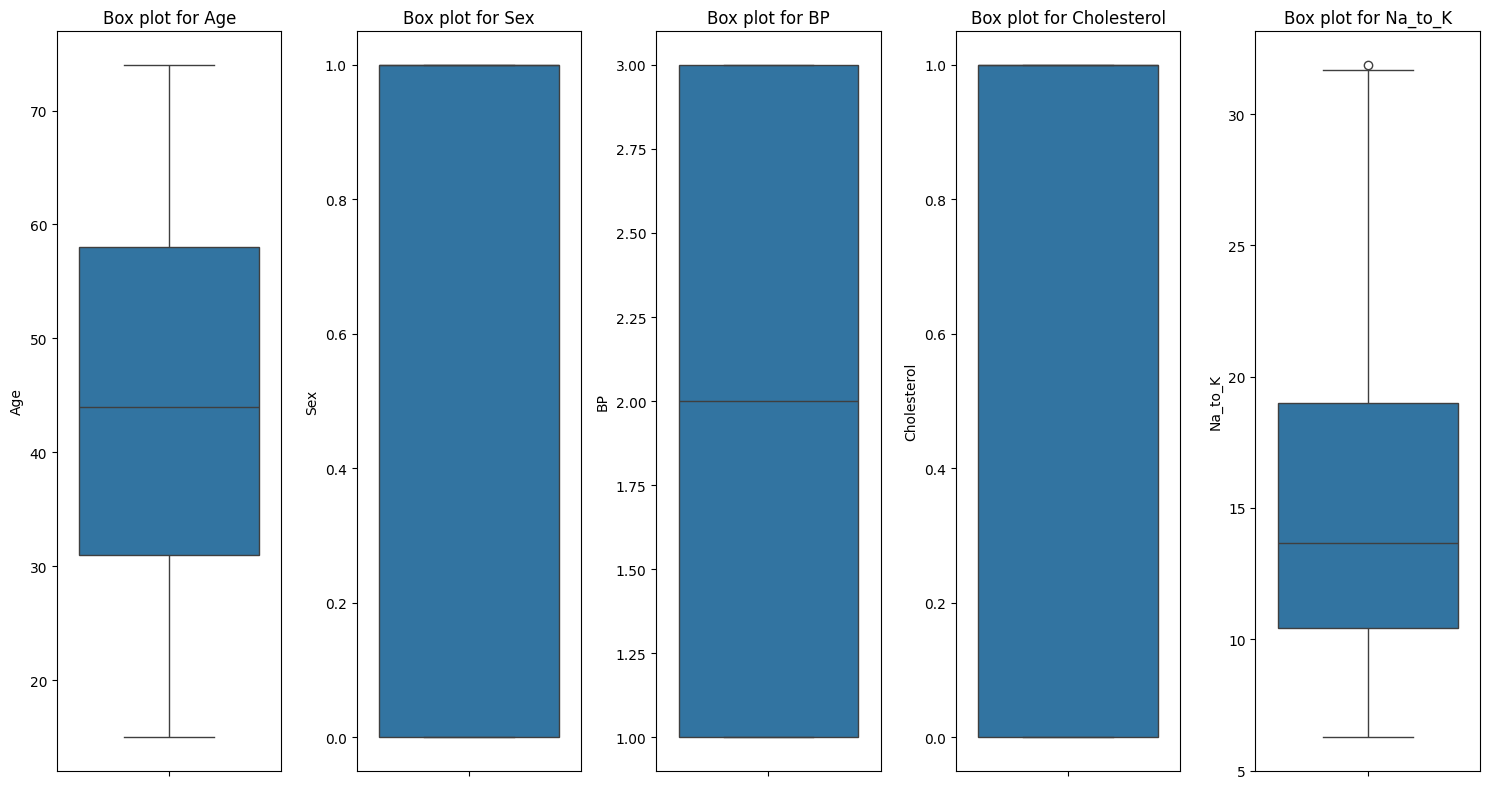

In [28]:
def plot_boxplots(df):
    # Select numeric columns
    numeric_columns = df.select_dtypes(include='number').columns

    # Set up the matplotlib figure
    plt.figure(figsize=(15, 8))
    for i, column in enumerate(numeric_columns, start=1):
        plt.subplot(1, len(numeric_columns), i)
        sns.boxplot(y=df[column])
        plt.title(f'Box plot for {column}')

    plt.tight_layout()
    plt.show()
plot_boxplots(data_cleaned)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
data_cleaned

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,3,1,25.355,DrugY
1,47,1,1,1,13.093,drugC
2,47,1,1,1,10.114,drugC
3,28,0,2,1,7.798,drugX
4,61,0,1,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,1,11.567,drugC
196,16,1,1,1,12.006,drugC
197,52,1,2,1,9.894,drugX
198,23,1,2,0,14.020,drugX


In [31]:
y=data_cleaned[['Drug']]
y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [32]:
x=data_cleaned.drop('Drug',axis=1)
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,3,1,25.355
1,47,1,1,1,13.093
2,47,1,1,1,10.114
3,28,0,2,1,7.798
4,61,0,1,1,18.043
...,...,...,...,...,...
195,56,0,1,1,11.567
196,16,1,1,1,12.006
197,52,1,2,1,9.894
198,23,1,2,0,14.020


In [37]:
y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [72]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,train_size=0.8)

In [73]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
154,37,1,1,0,16.724
177,25,1,2,1,19.011
85,59,1,3,1,13.935
71,28,0,2,1,19.675
74,31,1,3,0,17.069
...,...,...,...,...,...
20,57,1,1,0,19.128
23,48,0,1,1,15.036
155,49,1,1,1,10.537
36,32,1,3,0,9.445


In [74]:
y_train

,Drug
154,DrugY
177,DrugY
85,drugB
71,DrugY
74,DrugY
...,...
20,DrugY
23,DrugY
155,drugC
36,drugA


In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

c:\Users\printL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [80]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7435897435897436


In [77]:
y_pred

array(['drugA', 'drugA', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX',
       'DrugY', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugX', 'drugX',
       'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

c:\Users\printL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\printL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\printL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\printL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:2

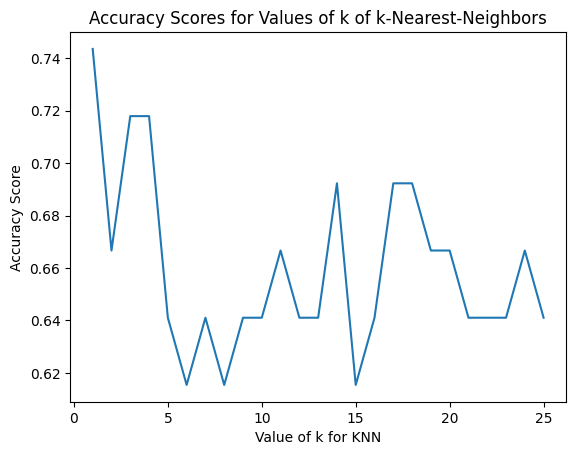

In [78]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()